# GLBL 5010 - Assignment 1

In [140]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [141]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk2_accounting.csv?raw=true'
df = pd.read_csv(url, sep='\t')

In [142]:
alpha = 0.3

## Task 1a

$Y = AK^{0.3}L^{0.7}$

$\frac{Y}{L} = \frac{AK^{0.3}}{L}$

$y = Ak^{0.3}$

## Task 1b

In [143]:
gdppc60 = df['cgdpo1960'] / df['pop1960']
gdppc18 = df['cgdpo2018'] / df['pop2018']

n = 2018-1960
g = np.log(gdppc18/gdppc60)/n

df['y1960'] = gdppc60
df['y2018'] = gdppc18
df['growth'] = g

In [144]:
Y = df['growth']

X = np.log(df['y1960'])
X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing="drop")
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.816
Date:                Sat, 24 Jan 2026   Prob (F-statistic):              0.181
Time:                        14:23:44   Log-Likelihood:                 282.16
No. Observations:                 102   AIC:                            -560.3
Df Residuals:                     100   BIC:                            -555.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0401      0.013      3.198      0.0

## Task 1c

In [145]:
df["k1960"] = df["cn1960"] / df["pop1960"]
df["k2018"] = df["cn2018"] / df["pop2018"]

df['A1960'] = df['y1960'] / df['k1960']**alpha
df['A2018'] = df['y2018'] / df['k2018']**alpha

In [146]:
df['lny1960'] = np.log(df['y1960'])
df['lnA1960'] = np.log(df['A1960'])
df['lnk1960'] = np.log(df['k1960'])

df['lny2018'] = np.log(df['y2018'])
df['lnA2018'] = np.log(df['A2018'])
df['lnk2018'] = np.log(df['k2018'])

In [147]:
df['lnA1960'].describe()

count    102.000000
mean       5.366537
std        0.620780
min        3.187132
25%        4.916053
50%        5.388751
75%        5.826132
max        6.636096
Name: lnA1960, dtype: float64

## Task 1d

Text(0, 0.5, 'lny1960')

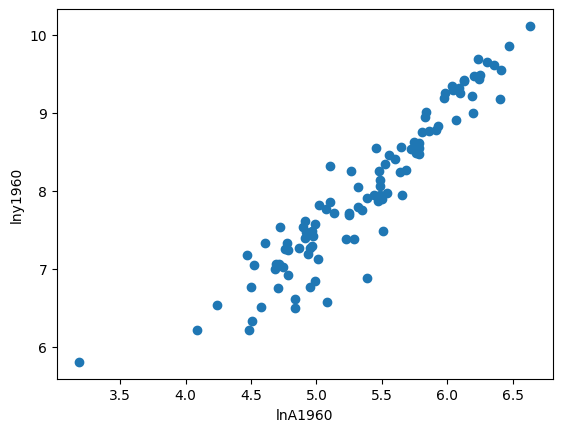

In [148]:
plt.scatter(df['lnA1960'], df['lny1960'])
plt.xlabel('lnA1960')
plt.ylabel('lny1960')

In [149]:
correlation_matrix = np.corrcoef(df['lny1960'].dropna(), df['lnA1960'].dropna())

# The correlation coefficient between x and y is the off-diagonal element (e.g., [0, 1])
pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9405769655007491


## Task 1e

In [150]:
usa_tfp2018 = df.loc[df["countrycode"] == "USA", 'lnA2018'].values[0]
df['hypA2018'] = usa_tfp2018
df['hypy2018'] = df['hypA2018'] * df['k2018']**alpha
df['hypgrowth'] = np.log(df['hypy2018'] / df['y1960']) / n

In [151]:
print(np.log(df.loc[df['countrycode'] == 'ARG', 'hypy2018']).values[0])
print(df.loc[df['countrycode'] == 'ARG', 'hypy2018'].values[0])
print(df.loc[df['countrycode'] == 'ARG', 'hypgrowth'].values[0])

5.3658623601917395
213.97567924846766
-0.04644215802328067


## Task 1f

In [152]:
Y = df['hypgrowth']

X = np.log(df['y1960'])
X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing="drop")
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              hypgrowth   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     437.6
Date:                Sat, 24 Jan 2026   Prob (F-statistic):           2.64e-38
Time:                        14:23:44   Log-Likelihood:                 386.74
No. Observations:                 102   AIC:                            -769.5
Df Residuals:                     100   BIC:                            -764.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0450      0.004     10.016      0.0

## Task 2a

$Y = AK^{0.3}(HL)^{0.7}$

$\frac{Y}{L} = \frac{AK^{0.3}H^{0.7}}{L}$

$y = Ak^{0.3}H^{0.7}$

## Task 2b

In [153]:
df['y2018new'] = df['cgdpo2018'] / df['pop2018']
df['k2018new'] = df['cn2018'] / df['pop2018']
df['A2018new'] = df['y2018new'] / ((df['k2018new'] ** alpha) * df['hc2018']**(1 - alpha))

df['lny2018new'] = np.log(df['y2018new'])
df['lnk2018new'] = np.log(df['k2018new'])
df['lnA2018new'] = np.log(df['A2018new'])

In [154]:
df['lnA2018new'].describe()

count    142.000000
mean       5.534659
std        0.644604
min        3.906385
25%        5.060724
50%        5.549135
75%        6.024111
max        6.943093
Name: lnA2018new, dtype: float64

## Task 2c

Text(0, 0.5, 'lny2018')

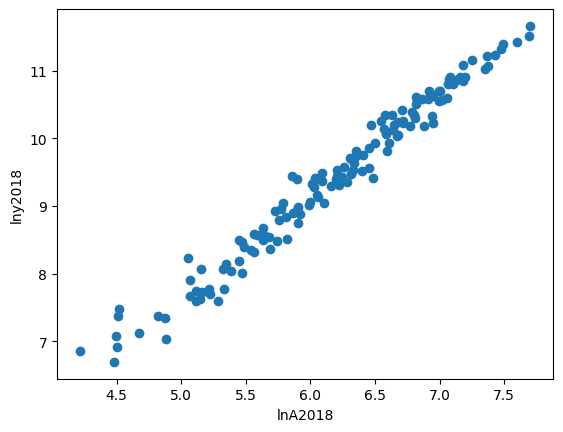

In [160]:
plt.scatter(df['lnA2018'], df['lny2018'])
plt.xlabel('lnA2018')
plt.ylabel('lny2018')

In [156]:
correlation_matrix = np.corrcoef(df['lny2018new'].dropna(), df['lnA2018new'].dropna())

pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9611858176665091


## Task 2d

Text(0, 0.5, 'lnA2018new')

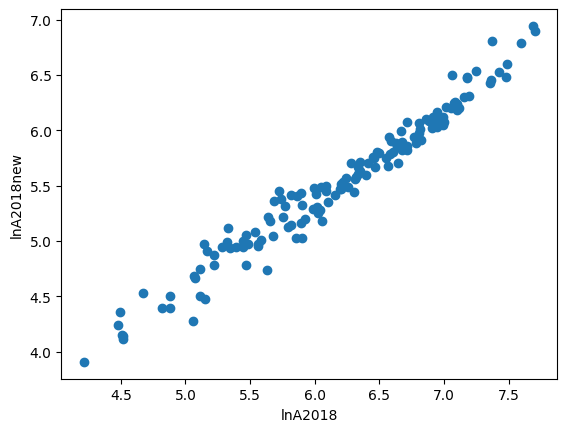

In [157]:
plt.scatter(df['lnA2018'], df['lnA2018new'])
plt.xlabel('lnA2018')
plt.ylabel('lnA2018new')

In [158]:
correlation_matrix = np.corrcoef(df['lnA2018'].dropna(), df['lnA2018new'].dropna())

pearson_coeff = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_coeff}")

Pearson correlation coefficient: 0.9821181768687952
